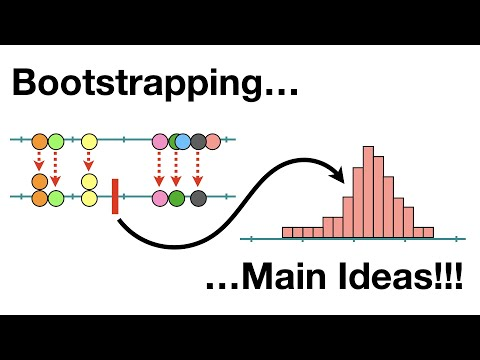

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#1

The **standard deviation** measures the variability or spread of the original data points around the mean. It shows how much individual data points typically differ from the average value.

The **standard error of the mean** (SEM) reflects the precision of the sample mean as an estimate of the true population mean. It decreases as sample size increases and is calculated by dividing the standard deviation by the square root of the sample size. 

In short, **standard deviation** captures the variability within the data, while **standard error** captures the uncertainty in the estimate of the mean.

#2
Assuming that the distribution is normal,

Confidence Interval= xˉ ± (1.96×SEM)

xˉ is the sample mean, SEM is Standard error of the mean, and 1.96 is the z-score corresponding to the 95% confidence level.

For a 95% confidence interval, the critical value (z-score) is 1.96 because 95% of the area under a standard normal curve falls within 1.96 standard errors on either side of the mean.

#3

To create a 95% bootstrapped confidence interval without using the standard error:
1. Generate many bootstrapped sample means (ex. 1,000 or more)
        Repeatedly resample the original data with replacement and calculat the mean for each sample
2. Sort the bootstrapped means in ascending order.
3. Identify the 2.5th and 97.5th percentiles of the sorted bootstrapped means
        2.5th and 97.5th percentiles bounds the 95% bootstrapped confidence interval
        
        How to get 2.5th and 97.5th percentiles:
                lower_bound = np.quantile(bootstrapped_means, 0.025) # gets 2.5 percentile from the array of bootstrapped means
                upper_bound = np.quantile(bootstrapped_means, 0.975) # gets 97.5 percentile from the array of bootstrapped means
        

In [16]:
#4

import numpy as np

# Sample data (replace with your sample data)
sample_data = [2.5, 3.6, 3.8, 4.0, 4.2, 5.1, 5.3, 5.7, 5.9, 6.8]

# Number of bootstrap samples to generate
num_bootstrap_samples = 1000

# Step 1: Create bootstrap samples and calculate the desired parameter
bootstrap_array = []  # List to store bootstrapped sample parameters

for _ in range(num_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    
    
    '''
    You can modifie this part to get different parameters for the bootstrap_sample.
    1. calaulate the desired parameter from bootstrap_sample that is generated
    2. store it in the bootstrap_array
    '''
    # Calculate the desired statistic (mean in this example)
    sample_mean = np.mean(bootstrap_sample)
    bootstrap_array.append(sample_mean)
    

# Step 2: Calculate the 95% confidence interval using np.quantile
lower_bound = np.quantile(bootstrap_array, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrap_array, 0.975)  # 97.5th percentile

# Output the 95% confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")


95% Bootstrap Confidence Interval for the Mean: (3.87, 5.42)


Chat summary

Link: https://chatgpt.com/share/66ff45c7-1104-8012-9d6b-11c4db53899e

1. **Understanding Differences Between Standard Error and Standard Deviation**:
   - We discussed the difference between the **standard error of the mean (SEM)** and the **standard deviation**. The standard deviation measures the variability within the original data, while the standard error estimates the precision of the sample mean as an estimate of the true population mean.

2. **Constructing a 95% Confidence Interval Using SEM**:
   - I explained how to construct a 95% confidence interval using the standard error and the formula \(\bar{x} \pm 1.96 \times \text{SEM}\). This interval is expected to cover approximately 95% of the bootstrapped sample means, assuming a normal distribution.

3. **Creating a 95% Bootstrapped Confidence Interval Using Bootstrapped Means**:
   - We discussed an alternative approach to construct a 95% confidence interval using **bootstrapped means**. By sorting the bootstrapped means and extracting the 2.5th and 97.5th percentiles using `np.quantile()`, we directly capture the central 95% of bootstrapped values without using the SEM.

4. **Implementing a 95% Bootstrapped Confidence Interval in Code**:
   - I provided Python code that generates bootstrapped samples, calculates the sample mean for each, and constructs a 95% confidence interval using `np.quantile`. I also commented on how to modify the code to create confidence intervals for different statistics, such as the **median**, by changing `np.mean` to `np.median` in the code.


#5

We need to distinguish between the population parameter and the sample statistic because the population parameter is what we are trying to estimate using the sample statistic. We calculate the sample statistic from our sample data and use it as an estimate of the unknown population parameter. The confidence interval is then constructed around the sample statistic to show the range of values within which the true population parameter is likely to fall.

#6

1. What is the process of bootstrapping?
    We generates various samples from the existing data using sampling with replacment(allowing dupilcates) in sample sizesame as the data size. After generating these new samples, you calculate your desired statistic (ex. mean, median) for each one. The result is a collection of different values for your statistic, which you can use to estimate the variability and create confidence intervals.
        
2. What is the main purpose of bootstrapping?
    The main purpose of bootstrapping is to get various version samples form the existing data without having to collect more data.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
    Follow the steps in quesion 1 above to get the collection of bootstrap means. From these bootstrap means, construct a 95% confidence interval (or any other confidence interval) by taking the 2.5th and 97.5th percentiles of the bootstrapped means. Check if your hypothesized guess falls inside this interval. If it does, it suggests that your guess could be a plausible value for the true population mean. If it falls outside, then it’s less likely that your hypothesized mean is accurate based on the given sample.


#7

An overlap of the confidence interval with zero means that zero is a plausible value for the true effect. In other words, because zero is within the range of values that could represent the actual mean, it suggests that the drug might have no effect on average. Therefore, even if the sample mean isn’t zero, the interval tells us that we don’t have enough evidence to confidently say that the effect is different from zero. This is why we fail to reject the null hypothesis.

To reject the null hypothesis, the confidence interval should not include zero. This would indicate that all plausible values for the true mean effect are either higher or lower than zero, providing strong evidence that the drug has a positive or negative effect.

#8

Problem Introduction
AliTech has developed a new vaccine to improve health outcomes. We want to determine if the vaccine is effective by comparing patients' health scores before and after receiving the vaccine. To evaluate this, we’ll test the null hypothesis that the vaccine has no effect on patients' health. In other words, the mean difference between the initial and final health scores should be zero if the vaccine does nothing.

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  \
0          1   45      M                  84                86   
1          2   34      F                  78                86   
2          3   29      M                  83                80   
3          4   52      F                  81                86   
4          5   37      M                  81                84   
5          6   41      F                  80                86   
6          7   33      M                  79                86   
7          8   48      F                  85                82   
8          9   26      M                  76                83   
9         10   39      F                  83                84   

   HealthDifference  
0                 2  
1                 8  
2                -3  
3                 5  
4                 3  
5                 6  
6                 7  
7                -3  
8                 7  
9                 1  


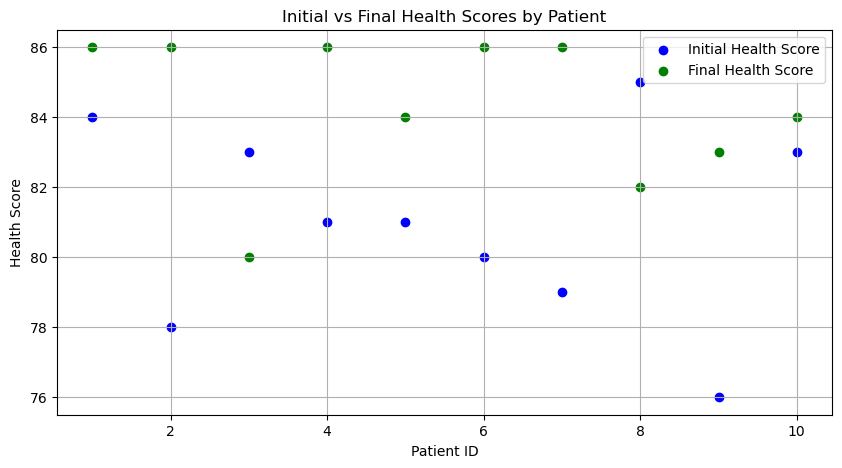

95% Bootstrap Confidence Interval for the Mean Health Difference: (0.70, 5.50)


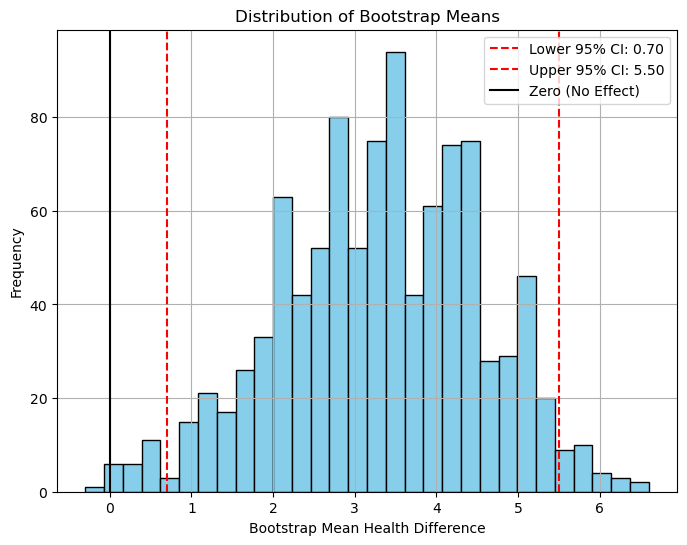

Conclusion: Reject the null hypothesis. The vaccine has a significant effect on health scores.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(42)


#file_path = r"C:\Users\colon\Desktop\vaccine_data.csv" 
#data = pd.read_csv(file_path) This dosn't work





# Step 1: Load the data directly as a Python dictionary
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)


# Step 2: Calculate the difference between final and initial health scores
df['HealthDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Display the data to verify
print(df)

# Step 3: Initial Data Visualization - Scatter Plot of Initial vs Final Health Scores
plt.figure(figsize=(10, 5))
plt.scatter(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', color='blue')
plt.scatter(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', color='green')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores by Patient')
plt.legend()
plt.grid()
plt.show()

# Step 4: Bootstrapping Methodology to Calculate 95% Confidence Interval
num_bootstrap_samples = 1000
bootstrap_means = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = df['HealthDifference'].sample(n=len(df), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Step 5: Calculate 95% Confidence Interval for the Mean Health Difference
lower_bound = np.quantile(bootstrap_means, 0.025)
upper_bound = np.quantile(bootstrap_means, 0.975)
print(f"95% Bootstrap Confidence Interval for the Mean Health Difference: ({lower_bound:.2f}, {upper_bound:.2f})")

# Step 6: Visualize Bootstrap Results with Histogram
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower 95% CI: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper 95% CI: {upper_bound:.2f}')
plt.axvline(0, color='black', linestyle='-', label='Zero (No Effect)')
plt.xlabel('Bootstrap Mean Health Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Means')
plt.legend()
plt.grid()
plt.show()

# Step 7: Conclusion Based on the Confidence Interval
if lower_bound > 0 or upper_bound < 0:
    print("Conclusion: Reject the null hypothesis. The vaccine has a significant effect on health scores.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The data does not provide strong evidence that the vaccine has a significant effect.")

Conclusion Regarding the Null Hypothesis of "No Effect"

The 95% bootstrap confidence interval for the mean health difference indicates whether zero is a plausible value. If zero is included, it means we fail to reject the null hypothesis, suggesting the vaccine has no significant effect. If zero is not included, we reject the null hypothesis, indicating that the vaccine has a significant effect.

Further Considerations

Small Sample Size: The analysis is based on only 10 patients, making results less reliable. Larger samples would provide stronger evidence.
Health Variability: Initial health levels vary, which could impact how the vaccine's effect is measured.
Other Factors: Age, gender, or lifestyle could influence health scores, so future studies should control for these variables.
Timeframe: The timeframe between initial and final scores isn’t given, making it hard to attribute changes directly to the vaccine.
These points suggest that while the current results are informative, more data and context are needed for a definitive conclusion.

Chatbot Summary

Link https://chatgpt.com/share/66ff45c7-1104-8012-9d6b-11c4db53899e

### Summary of Our Interactions:

1. **Initial Problem Introduction**:
   - You shared a project for analyzing vaccine data to assess its effectiveness using a dataset with initial and final health scores for 10 patients.
   - We discussed using bootstrapping and hypothesis testing to determine whether the vaccine had a significant effect.

2. **Understanding the Null Hypothesis**:
   - We defined the null hypothesis in this context: "The vaccine has no effect on health scores on average."
   - The goal was to determine if the observed changes in health scores were significantly different from zero.

3. **Data Visualization and Quantitative Analysis**:
   - We created scatter plots comparing initial and final health scores to visualize changes.
   - Bootstrapping was used to generate many resamples of the health score differences, and we calculated the 95% confidence interval for the mean health difference.

4. **Code Implementation**:
   - We wrote Python code that directly defined the dataset without using an external CSV file.
   - The code included data loading, health score difference calculation, bootstrapping, and visualization.
   - We addressed common coding errors such as `SyntaxError` from incorrect string paths and provided fixes using raw string literals (`r""`).

5. **Conclusion and Further Considerations**:
   - We concluded that if the confidence interval **includes zero**, we **fail to reject** the null hypothesis, suggesting no significant effect. If the interval **excludes zero**, we **reject** the null hypothesis, indicating a significant effect.
   - We summarized potential limitations, including small sample size, variation in initial health, and lack of other controlling variables.

Overall, the project involved data visualization, bootstrapping, and hypothesis testing to evaluate the vaccine's impact, with a focus on interpreting the results based on the 95% confidence interval. This summary reflects the discussions and code adjustments made during the assignment process.